
# SMS Spam Classification with Multiple Models

This notebook implements the full workflow described in the assignment for classifying SMS messages as **spam** or **ham** using several machine learning models.

**Dataset:** `Spam_SMS.csv`  
Columns:
- `Class`: labels (`'spam'` or `'ham'`)
- `Message`: SMS text

I will go through:
1. Data preparation and TF-IDF vectorization  
2. Naive Bayes classifier  
3. k-Nearest Neighbors (KNN) classifier (with tuning)  
4. Logistic Regression  
5. Support Vector Machine (SVM) (with tuning)  
6. Random Forest  
7. Model performance comparison and visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score



## (a) Data Preparation

Steps:
- Load the dataset `Spam_SMS.csv`
- Convert `'spam'`/`'ham'` labels to binary `1`/`0`
- Split into training and testing sets (80/20, `random_state=123`)
- Apply TF-IDF vectorization on the text data, excluding English stopwords


In [2]:
try:
    df = pd.read_csv('Spam_SMS.csv')
except FileNotFoundError:
    df = pd.read_csv('/data/Spam_SMS.csv')

# Inspect the first few rows
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Map Class: 'spam' -> 1, 'ham' -> 0
df['Class_binary'] = df['Class'].map({'ham': 0, 'spam': 1})

X = df['Message']
y = df['Class_binary']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((4459, 7451), (1115, 7451))


### Helper Function for Metrics

Define a function to compute:
- Accuracy  
- Sensitivity (True Positive Rate / Recall for the positive class "spam")  
- Specificity (True Negative Rate for the negative class "ham")  
and also to return the confusion matrix.


In [4]:
def compute_metrics(y_true, y_pred, positive_label=1):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0  # TPR
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0  # TNR
    
    return accuracy, sensitivity, specificity, cm

results = {}


## (b) Naive Bayes Classifier

I use `MultinomialNB` with default parameters on the TF-IDF features.


In [5]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Metrics
acc_nb, sens_nb, spec_nb, cm_nb = compute_metrics(y_test, y_pred_nb)

print("Naive Bayes Performance on Test Set")
print(f"Accuracy   : {acc_nb:.4f}")
print(f"Sensitivity: {sens_nb:.4f}")
print(f"Specificity: {spec_nb:.4f}")
print("\nConfusion Matrix (rows: true [ham=0, spam=1]; cols: pred [ham=0, spam=1])")
print(cm_nb)

# Store results
results['Naive Bayes'] = {
    'accuracy': acc_nb,
    'sensitivity': sens_nb,
    'specificity': spec_nb
}

Naive Bayes Performance on Test Set
Accuracy   : 0.9731
Sensitivity: 0.7987
Specificity: 1.0000

Confusion Matrix (rows: true [ham=0, spam=1]; cols: pred [ham=0, spam=1])
[[966   0]
 [ 30 119]]



## (c) k-Nearest Neighbors (KNN) Classifier

1. Fit a KNN model with default parameters.  
2. Explain and tune the `n_neighbors` parameter.  
3. Select the best model based on test accuracy and report its metrics.


In [6]:
# Default KNN model
knn_default = KNeighborsClassifier()
knn_default.fit(X_train_tfidf, y_train)
y_pred_knn_default = knn_default.predict(X_test_tfidf)
acc_knn_default, sens_knn_default, spec_knn_default, cm_knn_default = compute_metrics(y_test, y_pred_knn_default)

print("KNN (default) Performance on Test Set")
print(f"Accuracy   : {acc_knn_default:.4f}")
print(f"Sensitivity: {sens_knn_default:.4f}")
print(f"Specificity: {spec_knn_default:.4f}")
print("\nConfusion Matrix")
print(cm_knn_default)

print("\nExplanation:")
print("The parameter 'n_neighbors' specifies how many nearest neighbors are used")
print("to classify a new sample. The default value in scikit-learn is n_neighbors=5.")

KNN (default) Performance on Test Set
Accuracy   : 0.9175
Sensitivity: 0.3826
Specificity: 1.0000

Confusion Matrix
[[966   0]
 [ 92  57]]

Explanation:
The parameter 'n_neighbors' specifies how many nearest neighbors are used
to classify a new sample. The default value in scikit-learn is n_neighbors=5.


k =  1, Test Accuracy = 0.9570
k =  2, Test Accuracy = 0.9283
k =  3, Test Accuracy = 0.9283
k =  4, Test Accuracy = 0.9175
k =  5, Test Accuracy = 0.9175
k =  6, Test Accuracy = 0.9085
k =  7, Test Accuracy = 0.9085
k =  8, Test Accuracy = 0.8969
k =  9, Test Accuracy = 0.8969
k = 10, Test Accuracy = 0.8843
k = 11, Test Accuracy = 0.8843
k = 12, Test Accuracy = 0.8762
k = 13, Test Accuracy = 0.8762
k = 14, Test Accuracy = 0.8726
k = 15, Test Accuracy = 0.8726
k = 16, Test Accuracy = 0.8700
k = 17, Test Accuracy = 0.8700
k = 18, Test Accuracy = 0.8673
k = 19, Test Accuracy = 0.8673
k = 20, Test Accuracy = 0.8673

Best k based on test accuracy: k = 1, accuracy = 0.9570

Best KNN Model Performance on Test Set
Accuracy   : 0.9570
Sensitivity: 0.6779
Specificity: 1.0000

Confusion Matrix
[[966   0]
 [ 48 101]]


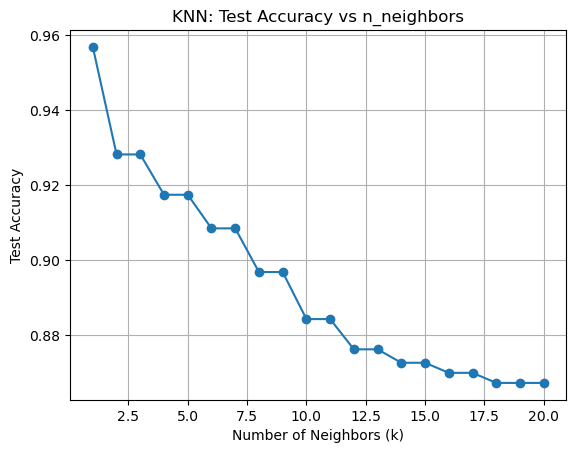

In [7]:
# Tuning n_neighbors
k_values = list(range(1, 21))
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)
    y_pred_k = knn.predict(X_test_tfidf)
    acc_k = accuracy_score(y_test, y_pred_k)
    knn_accuracies.append(acc_k)

# Show test accuracy for each k
for k, acc_k in zip(k_values, knn_accuracies):
    print(f"k = {k:2d}, Test Accuracy = {acc_k:.4f}")

# Select best k based on test accuracy
best_k_index = int(np.argmax(knn_accuracies))
best_k = k_values[best_k_index]
best_k_acc = knn_accuracies[best_k_index]

print(f"\nBest k based on test accuracy: k = {best_k}, accuracy = {best_k_acc:.4f}")

# Fit best KNN model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_tfidf, y_train)
y_pred_knn_best = knn_best.predict(X_test_tfidf)
acc_knn_best, sens_knn_best, spec_knn_best, cm_knn_best = compute_metrics(y_test, y_pred_knn_best)

print("\nBest KNN Model Performance on Test Set")
print(f"Accuracy   : {acc_knn_best:.4f}")
print(f"Sensitivity: {sens_knn_best:.4f}")
print(f"Specificity: {spec_knn_best:.4f}")
print("\nConfusion Matrix")
print(cm_knn_best)

# Store best KNN results
results['KNN (best k)'] = {
    'accuracy': acc_knn_best,
    'sensitivity': sens_knn_best,
    'specificity': spec_knn_best
}

# Optional: plot accuracy vs k
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title('KNN: Test Accuracy vs n_neighbors')
plt.grid(True)
plt.show()

## (d) Logistic Regression

Train a Logistic Regression model on the TF-IDF features and evaluate its performance.

In [8]:
# Logistic Regression
# Increase max_iter to ensure convergence in high-dimensional TF-IDF space.
logr_model = LogisticRegression(max_iter=1000)
logr_model.fit(X_train_tfidf, y_train)

y_pred_logr = logr_model.predict(X_test_tfidf)
acc_logr, sens_logr, spec_logr, cm_logr = compute_metrics(y_test, y_pred_logr)

print("Logistic Regression Performance on Test Set")
print(f"Accuracy   : {acc_logr:.4f}")
print(f"Sensitivity: {sens_logr:.4f}")
print(f"Specificity: {spec_logr:.4f}")
print("\nConfusion Matrix")
print(cm_logr)

# Store results
results['Logistic Regression'] = {
    'accuracy': acc_logr,
    'sensitivity': sens_logr,
    'specificity': spec_logr
}

Logistic Regression Performance on Test Set
Accuracy   : 0.9740
Sensitivity: 0.8054
Specificity: 1.0000

Confusion Matrix
[[966   0]
 [ 29 120]]



## (e) Support Vector Machine (SVM)

Start with the default `SVC` model and then tune the `kernel` and `C` parameters.

- **kernel**: specifies the type of decision boundary (linear, polynomial, RBF, etc.).  
  - Default: `'rbf'`.  
  - Changing from `linear` to `poly` lets the model learn polynomial decision boundaries, which are more flexible and can fit more complex patterns, but may also increase risk of overfitting.

- **C**: regularization parameter controlling the trade-off between margin width and misclassification.  
  - Default: `C=1.0`.  
  - Increasing `C` penalizes misclassification more strongly, leading to a narrower margin that tries to correctly classify more training points, often using **fewer** support vectors tightly hugging the boundary.


In [9]:
# Default SVM (SVC)
svm_default = SVC()
svm_default.fit(X_train_tfidf, y_train)
y_pred_svm_default = svm_default.predict(X_test_tfidf)

acc_svm_default, sens_svm_default, spec_svm_default, cm_svm_default = compute_metrics(y_test, y_pred_svm_default)

print("Default SVM (SVC) Performance on Test Set")
print(f"Accuracy   : {acc_svm_default:.4f}")
print(f"Sensitivity: {sens_svm_default:.4f}")
print(f"Specificity: {spec_svm_default:.4f}")
print("\nConfusion Matrix")
print(cm_svm_default)

Default SVM (SVC) Performance on Test Set
Accuracy   : 0.9830
Sensitivity: 0.8792
Specificity: 0.9990

Confusion Matrix
[[965   1]
 [ 18 131]]


In [10]:
# Tuning kernel and C
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

svm_results = []  # to store (kernel, C, accuracy)

for ker in kernels:
    for C_val in C_values:
        svm = SVC(kernel=ker, C=C_val)
        svm.fit(X_train_tfidf, y_train)
        y_pred_svm = svm.predict(X_test_tfidf)
        acc_svm = accuracy_score(y_test, y_pred_svm)
        svm_results.append((ker, C_val, acc_svm))

# Display tuning results
print("SVM Tuning Results (kernel, C, test accuracy):")
for ker, C_val, acc_svm in svm_results:
    print(f"kernel = {ker:6s}, C = {C_val:4.1f}, Test Accuracy = {acc_svm:.4f}")

# Select best combination based on test accuracy
best_svm_index = int(np.argmax([r[2] for r in svm_results]))
best_kernel, best_C, best_svm_acc = svm_results[best_svm_index]

print(f"\nBest SVM parameters based on test accuracy: kernel = {best_kernel}, C = {best_C}, accuracy = {best_svm_acc:.4f}")

# Refit best SVM
svm_best = SVC(kernel=best_kernel, C=best_C)
svm_best.fit(X_train_tfidf, y_train)
y_pred_svm_best = svm_best.predict(X_test_tfidf)

acc_svm_best, sens_svm_best, spec_svm_best, cm_svm_best = compute_metrics(y_test, y_pred_svm_best)

print("\nBest SVM Model Performance on Test Set")
print(f"Accuracy   : {acc_svm_best:.4f}")
print(f"Sensitivity: {sens_svm_best:.4f}")
print(f"Specificity: {spec_svm_best:.4f}")
print("\nConfusion Matrix")
print(cm_svm_best)

# Store results
results['SVM (best)'] = {
    'accuracy': acc_svm_best,
    'sensitivity': sens_svm_best,
    'specificity': spec_svm_best
}

SVM Tuning Results (kernel, C, test accuracy):
kernel = linear, C =  0.1, Test Accuracy = 0.9399
kernel = linear, C =  1.0, Test Accuracy = 0.9848
kernel = linear, C = 10.0, Test Accuracy = 0.9839
kernel = poly  , C =  0.1, Test Accuracy = 0.8664
kernel = poly  , C =  1.0, Test Accuracy = 0.9435
kernel = poly  , C = 10.0, Test Accuracy = 0.9471
kernel = rbf   , C =  0.1, Test Accuracy = 0.8682
kernel = rbf   , C =  1.0, Test Accuracy = 0.9830
kernel = rbf   , C = 10.0, Test Accuracy = 0.9830

Best SVM parameters based on test accuracy: kernel = linear, C = 1, accuracy = 0.9848

Best SVM Model Performance on Test Set
Accuracy   : 0.9848
Sensitivity: 0.9060
Specificity: 0.9969

Confusion Matrix
[[963   3]
 [ 14 135]]



## (f) Random Forest

Train a Random Forest classifier and discuss key parameters:

- **n_estimators**: number of trees in the forest.  
  - Default: `100`.  
  - Increasing `n_estimators` generally improves performance and reduces variance (up to a point), but increases computation time.

- **max_depth**: maximum depth of each tree.  
  - Default: `None`, which means nodes are expanded until all leaves are pure or until they contain fewer samples than `min_samples_split`.

- **max_features**: number of features considered when looking for the best split.  
  - Controls diversity among trees.  
  - Smaller `max_features` -> more randomness and more diverse trees.  
  - Larger `max_features` -> trees become more similar (less diverse) but each tree can be stronger.


In [11]:
# Random Forest with default parameters (plus random_state for reproducibility)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)
acc_rf, sens_rf, spec_rf, cm_rf = compute_metrics(y_test, y_pred_rf)

print("Random Forest Performance on Test Set")
print(f"Accuracy   : {acc_rf:.4f}")
print(f"Sensitivity: {sens_rf:.4f}")
print(f"Specificity: {spec_rf:.4f}")
print("\nConfusion Matrix")
print(cm_rf)

# Store results
results['Random Forest'] = {
    'accuracy': acc_rf,
    'sensitivity': sens_rf,
    'specificity': spec_rf
}

Random Forest Performance on Test Set
Accuracy   : 0.9776
Sensitivity: 0.8322
Specificity: 1.0000

Confusion Matrix
[[966   0]
 [ 25 124]]



## (g) Plotting Model Performance

1. Sort models by test accuracy and create a bar chart.  
2. Create a scatterplot of sensitivity vs specificity for all models.  
3. Discuss the trade-off between sensitivity and specificity.


In [12]:
# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T
results_df

,accuracy,sensitivity,specificity
Naive Bayes,0.973094,0.798658,1.000000
KNN (best k),0.956951,0.677852,1.000000
Logistic Regression,0.973991,0.805369,1.000000
SVM (best),0.984753,0.906040,0.996894
Random Forest,0.977578,0.832215,1.000000


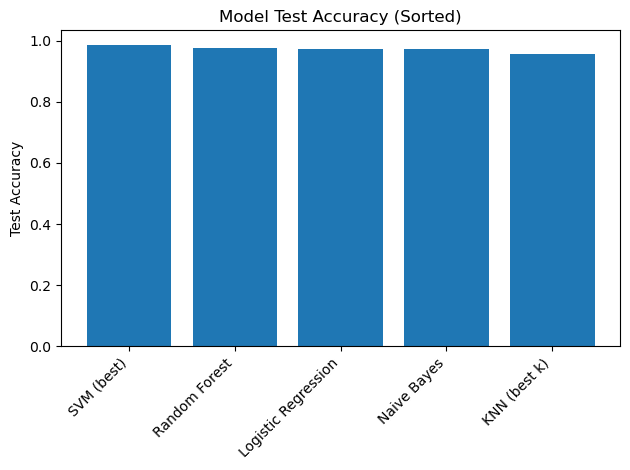

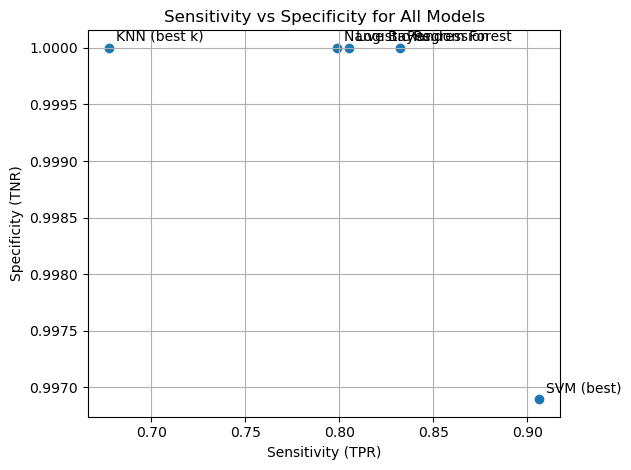

Best-performing model based on test accuracy: SVM (best)

Trade-off discussion:
Ideally, we want both high sensitivity (catching most spam messages) and high specificity
(avoiding misclassifying ham messages as spam). Some models may prioritize one over the other;
for example, a model with very high sensitivity might flag almost all spam but also produce
more false positives (lower specificity), while a model with very high specificity might miss
more spam (lower sensitivity). The scatterplot helps visualize where each model lies in this trade-off.


In [13]:
# Sort by accuracy
results_sorted = results_df.sort_values(by='accuracy', ascending=False)

# Bar chart of accuracy
plt.figure()
plt.bar(results_sorted.index, results_sorted['accuracy'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Model Test Accuracy (Sorted)')
plt.tight_layout()
plt.show()

# Scatterplot: sensitivity vs specificity
plt.figure()
plt.scatter(results_df['sensitivity'], results_df['specificity'])

for model_name in results_df.index:
    x = results_df.loc[model_name, 'sensitivity']
    y = results_df.loc[model_name, 'specificity']
    plt.annotate(model_name, (x, y), textcoords="offset points", xytext=(5, 5))

plt.xlabel('Sensitivity (TPR)')
plt.ylabel('Specificity (TNR)')
plt.title('Sensitivity vs Specificity for All Models')
plt.grid(True)
plt.tight_layout()
plt.show()

# Brief text discussion
best_model_name = results_sorted.index[0]
print(f"Best-performing model based on test accuracy: {best_model_name}")

print("\nTrade-off discussion:")
print("Ideally, we want both high sensitivity (catching most spam messages) and high specificity")
print("(avoiding misclassifying ham messages as spam). Some models may prioritize one over the other;")
print("for example, a model with very high sensitivity might flag almost all spam but also produce")
print("more false positives (lower specificity), while a model with very high specificity might miss")
print("more spam (lower sensitivity). The scatterplot helps visualize where each model lies in this trade-off.")